## Imports

In [58]:
import copy
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import random
import gc

## Importing Subject Data
From the vital sign dataset - the subject with the most rows of available data was selected, exported and loaded here

In [59]:

vital_signs_df = pd.read_csv("/kaggle/input/triage/15496609.csv")
vital_signs_df.drop(columns=['index', 'subject_id', 'stay_id'], inplace=True)
vital_signs_df

,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp
0,2159-01-26 19:07:00,97.7,83.0,16.0,96.0,106.0,69.0
1,2159-01-26 22:40:00,97.7,99.0,16.0,97.0,125.0,77.0
2,2159-01-27 06:08:00,99.1,120.0,17.0,96.0,176.0,101.0
3,2159-01-27 06:26:00,99.1,99.0,17.0,96.0,176.0,101.0
4,2159-01-27 06:43:00,99.1,93.0,19.0,100.0,136.0,83.0
...,...,...,...,...,...,...,...
1087,2165-07-24 07:50:00,98.8,85.0,16.0,99.0,160.0,81.0
1088,2165-07-24 14:23:00,98.2,102.0,17.0,95.0,109.0,67.0
1089,2165-08-02 19:08:00,97.2,112.0,16.0,95.0,103.0,45.0
1090,2165-08-07 14:05:00,96.6,91.0,17.0,98.0,158.0,99.0


In [60]:
vital_signs_df['charttime'] = pd.to_datetime(vital_signs_df['charttime'])
vital_signs_df.dtypes

charttime      datetime64[ns]
temperature           float64
heartrate             float64
resprate              float64
o2sat                 float64
sbp                   float64
dbp                   float64
dtype: object

Since the all the data has been offsetted by a random amount for deidentification where all the dates were between 2159 and 2165, therefore i modified the offset by -145 years as a guess so the dates dont look too wierd 😅 The new charttimes are between 2014 to 2020

In [61]:
# Define the offset to shift the dates by
offset = pd.DateOffset(years=145)

# Subtract the offset from the dates in the charttime column
vital_signs_df['charttime'] = vital_signs_df['charttime'] - offset

In [62]:
vital_signs_df

,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp
0,2014-01-26 19:07:00,97.7,83.0,16.0,96.0,106.0,69.0
1,2014-01-26 22:40:00,97.7,99.0,16.0,97.0,125.0,77.0
2,2014-01-27 06:08:00,99.1,120.0,17.0,96.0,176.0,101.0
3,2014-01-27 06:26:00,99.1,99.0,17.0,96.0,176.0,101.0
4,2014-01-27 06:43:00,99.1,93.0,19.0,100.0,136.0,83.0
...,...,...,...,...,...,...,...
1087,2020-07-24 07:50:00,98.8,85.0,16.0,99.0,160.0,81.0
1088,2020-07-24 14:23:00,98.2,102.0,17.0,95.0,109.0,67.0
1089,2020-08-02 19:08:00,97.2,112.0,16.0,95.0,103.0,45.0
1090,2020-08-07 14:05:00,96.6,91.0,17.0,98.0,158.0,99.0


In [63]:
# Set the 'charttime' column as the index
vital_signs_df.set_index('charttime', inplace=True)

In [64]:
vitaldf  = vital_signs_df
# Resample the data to a daily frequency
vitaldf = vitaldf.resample('D').mean()
vitaldf

,temperature,heartrate,resprate,o2sat,sbp,dbp
charttime,,,,,,
2014-01-26,97.700,91.00,16.00,96.50,115.5,73.00
2014-01-27,98.775,102.75,17.25,97.75,169.0,96.75
2014-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-29,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-05,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Interpolate the missing values
vitaldf = vitaldf.interpolate()
vitaldf

,temperature,heartrate,resprate,o2sat,sbp,dbp
charttime,,,,,,
2014-01-26,97.700000,91.000000,16.000000,96.50,115.500000,73.00
2014-01-27,98.775000,102.750000,17.250000,97.75,169.000000,96.75
2014-01-28,98.663333,101.433333,17.433333,97.70,160.066667,91.80
2014-01-29,98.551667,100.116667,17.616667,97.65,151.133333,86.85
2014-01-30,98.440000,98.800000,17.800000,97.60,142.200000,81.90
...,...,...,...,...,...,...
2020-08-03,97.080000,106.600000,16.200000,95.60,112.100000,54.90
2020-08-04,96.960000,101.200000,16.400000,96.20,121.200000,64.80
2020-08-05,96.840000,95.800000,16.600000,96.80,130.300000,74.70


In [66]:
cols_to_round = ['temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp']
vitaldf[cols_to_round] = vitaldf[cols_to_round].round(2)

In [67]:
vitaldf

,temperature,heartrate,resprate,o2sat,sbp,dbp
charttime,,,,,,
2014-01-26,97.70,91.00,16.00,96.50,115.50,73.00
2014-01-27,98.78,102.75,17.25,97.75,169.00,96.75
2014-01-28,98.66,101.43,17.43,97.70,160.07,91.80
2014-01-29,98.55,100.12,17.62,97.65,151.13,86.85
2014-01-30,98.44,98.80,17.80,97.60,142.20,81.90
...,...,...,...,...,...,...
2020-08-03,97.08,106.60,16.20,95.60,112.10,54.90
2020-08-04,96.96,101.20,16.40,96.20,121.20,64.80
2020-08-05,96.84,95.80,16.60,96.80,130.30,74.70


<AxesSubplot:xlabel='charttime'>

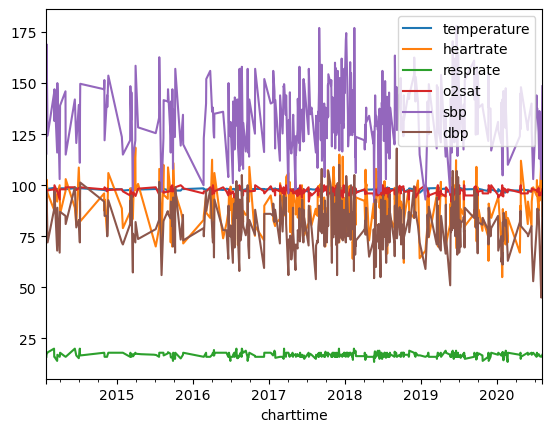

In [68]:
vitaldf.plot()

## Normalize the dataset values
Making it easier for the model to learn it.

In [69]:
from sklearn.preprocessing import MinMaxScaler
# from darts.dataprocessing.transformers import Scaler

scaler = MinMaxScaler(feature_range=(-1, 1))
transformer = scaler.fit(vitaldf)

In [70]:
import joblib

# Dump the model to a file
joblib.dump(scaler, 'forecast_scaler.joblib')

['forecast_scaler.joblib']

In [71]:
import pickle

# Dump the model to a file
with open('forecast_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [72]:
series_transformed = transformer.transform(vitaldf)
series_transformed

array([[ 0.03030303,  0.13385827, -0.23076923,  0.125     , -0.44927536,
        -0.23287671],
       [ 0.68484848,  0.50393701,  0.15384615,  0.4375    ,  0.79130435,
         0.41780822],
       [ 0.61212121,  0.4623622 ,  0.20923077,  0.425     ,  0.58423188,
         0.28219178],
       ...,
       [-0.49090909,  0.28503937, -0.04615385,  0.2       , -0.10608696,
        -0.18630137],
       [-0.56363636,  0.11496063,  0.01538462,  0.35      ,  0.10492754,
         0.08493151],
       [-0.63636364, -0.05511811,  0.07692308,  0.5       ,  0.31594203,
         0.35616438]])

## Split the data into a training set and a test set

In [73]:
train_size = int(len(series_transformed) * 0.8)
train_data = series_transformed[:train_size]
test_data = series_transformed[train_size:]

In [74]:
import xgboost as xgb

In [75]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse

## Creating the Model

In [76]:
train_size = int(len(series_transformed) * 0.8)
train_data = series_transformed[:train_size]
test_data = series_transformed[train_size:]

In [120]:
## Fitting models and checking the performance
def eval_model(model):
    model.fit(train_data[:-1], train_data[1:])
    forecast = model.predict(test_data[1:])
    print('model XGB obtains MAE: {:.2f}%'.format( mae(test_data[1:], forecast)))
    print('model XGB obtains RMSE: {:.2f}%'.format(rmse(test_data[1:], forecast)))
    return model,forecast

m_xgb, f_xgb = eval_model(xgb.XGBRegressor(objective='reg:squarederror',n_estimators=2000, max_depth=5))

model XGB obtains MAE: 0.11%
model XGB obtains RMSE: 0.03%


In [121]:
f_xgb

array([[ 0.4722663 ,  0.298037  ,  0.4771262 , -0.18651542, -0.04178013,
        -0.25676337],
       [ 0.45406887,  0.31887144,  0.36979133, -0.16523246, -0.1009024 ,
        -0.2427455 ],
       [ 0.3662967 ,  0.27272704,  0.3437274 , -0.20905656, -0.14143041,
        -0.27852938],
       ...,
       [-0.15915899,  0.1861778 , -0.08479473, -0.00308507,  0.02759731,
        -0.18524474],
       [ 0.26029086, -0.02933521, -0.01009488,  0.55419403,  0.18876381,
         0.24889264],
       [ 0.272663  ,  0.17664966,  0.37199834,  0.33330318,  0.29567927,
         0.2767522 ]], dtype=float32)

In [102]:
train_data_orig = transformer.inverse_transform(train_data)
test_data_orig = transformer.inverse_transform(test_data)
f_xgb_orig = transformer.inverse_transform(f_xgb)
f_xgb_orig

array([[ 98.42924 ,  96.21267 ,  18.300661,  95.25394 , 133.07323 ,
         72.128136],
       [ 98.399216,  96.87417 ,  17.95182 ,  95.33907 , 130.52357 ,
         72.63979 ],
       [ 98.25439 ,  95.40909 ,  17.867113,  95.16377 , 128.77582 ,
         71.33368 ],
       ...,
       [ 97.38739 ,  92.66115 ,  16.474417,  95.98766 , 136.06512 ,
         74.73856 ],
       [ 98.079475,  85.81861 ,  16.717192,  98.216774, 143.01544 ,
         90.58458 ],
       [ 98.0999  ,  92.35863 ,  17.958996,  97.33321 , 147.62616 ,
         91.601456]], dtype=float32)

## Visualising the Forecasting Results

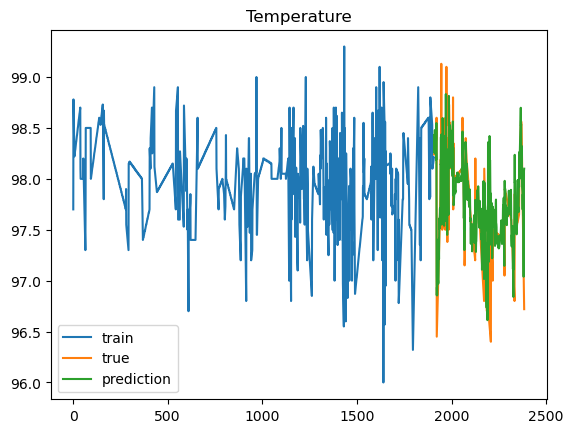

In [103]:
time_index_train = range(1, len(train_data_orig))
time_index_test = range(len(train_data_orig), len(train_data_orig) + len(test_data_orig) - 1)
plt.title("Temperature")
plt.plot(time_index_train, train_data_orig[:-1, 0], label='train')
plt.plot(time_index_test, test_data_orig[:-1, 0], label='true')
plt.plot(time_index_test, f_xgb_orig[:,0], label='prediction')
plt.legend();

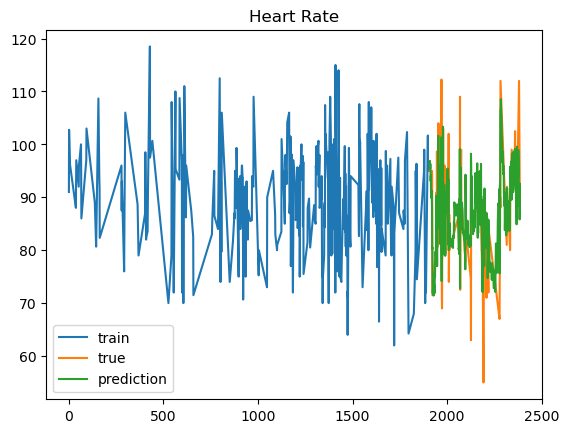

In [104]:
time_index_train = range(1, len(train_data_orig))
time_index_test = range(len(train_data_orig), len(train_data_orig) + len(test_data_orig) - 1)
plt.title("Heart Rate")
plt.plot(time_index_train, train_data_orig[:-1, 1], label='train')
plt.plot(time_index_test, test_data_orig[:-1, 1], label='true')
plt.plot(time_index_test, f_xgb_orig[:,1], label='prediction')
plt.legend();

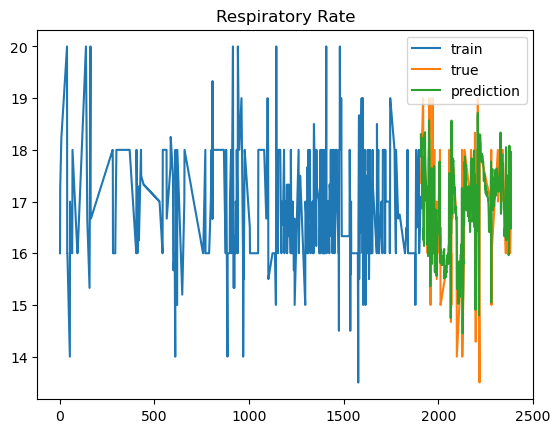

In [105]:
time_index_train = range(1, len(train_data_orig))
time_index_test = range(len(train_data_orig), len(train_data_orig) + len(test_data_orig) - 1)
plt.title("Respiratory Rate")
plt.plot(time_index_train, train_data_orig[:-1, 2], label='train')
plt.plot(time_index_test, test_data_orig[:-1, 2], label='true')
plt.plot(time_index_test, f_xgb_orig[:,2], label='prediction')
plt.legend();

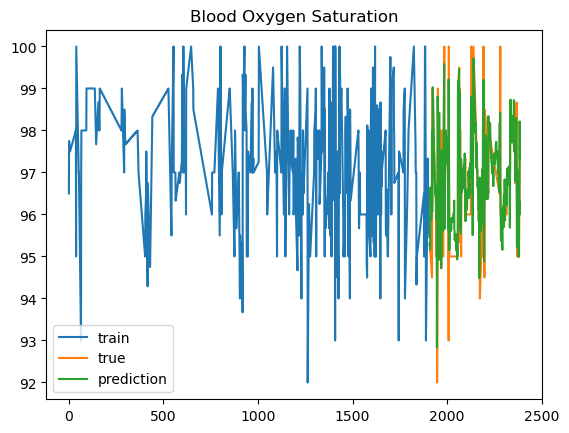

In [106]:
time_index_train = range(1, len(train_data_orig))
time_index_test = range(len(train_data_orig), len(train_data_orig) + len(test_data_orig) - 1)
plt.title("Blood Oxygen Saturation")
plt.plot(time_index_train, train_data_orig[:-1, 3], label='train')
plt.plot(time_index_test, test_data_orig[:-1, 3], label='true')
plt.plot(time_index_test, f_xgb_orig[:,3], label='prediction')
plt.legend();

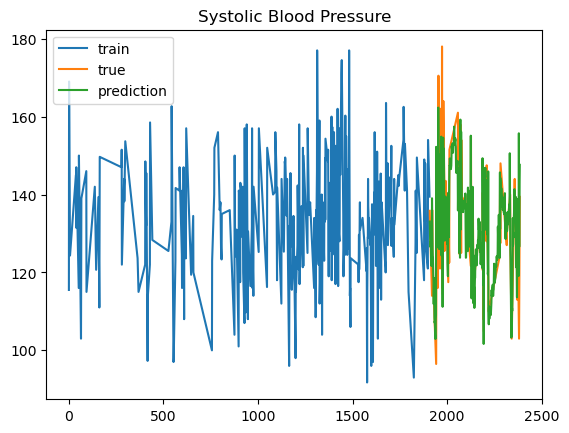

In [107]:
time_index_train = range(1, len(train_data_orig))
time_index_test = range(len(train_data_orig), len(train_data_orig) + len(test_data_orig) - 1)
plt.title("Systolic Blood Pressure")
plt.plot(time_index_train, train_data_orig[:-1, 4], label='train')
plt.plot(time_index_test, test_data_orig[:-1, 4], label='true')
plt.plot(time_index_test, f_xgb_orig[:,4], label='prediction')
plt.legend();

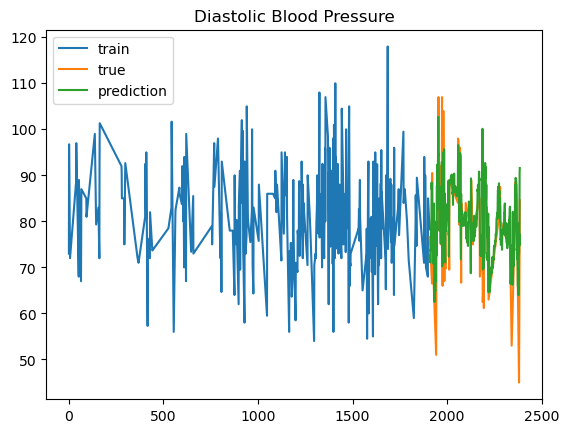

In [108]:
time_index_train = range(1, len(train_data_orig))
time_index_test = range(len(train_data_orig), len(train_data_orig) + len(test_data_orig) - 1)
plt.title("Diastolic Blood Pressure")
plt.plot(time_index_train, train_data_orig[:-1, 5], label='train')
plt.plot(time_index_test, test_data_orig[:-1, 5], label='true')
plt.plot(time_index_test, f_xgb_orig[:,5], label='prediction')
plt.legend();

## Saving the Model

In [109]:
# save to JSON
m_xgb.save_model("xgb_forecasting.json")

---

# Loading the saved model

In [110]:
forecasting_model = xgb.Booster()
forecasting_model.load_model("xgb_forecasting.json")
print("Loaded Model")

In [112]:
# Load the model joblib
forecasting_scaler = joblib.load('forecast_scaler.joblib')
print("Loaded Scaler")

### Preparing the Input Data

In [111]:
# Example Input - Would be multiple rows of data where each row would technically be the vitals of a day

data = [
 [ 98.6,   70. ,  16. ,  98. , 120. ,  80. ],
 [ 98.2,  68. ,  18. ,  96. , 122. ,  78. ],
 [ 98.4,  72. ,  20. ,  95. , 118. ,  82. ],
 [ 98.8,  75. ,  18. ,  97. , 125. ,  80. ],
 [ 99. ,  80. ,  22. ,  94. , 130. ,  85. ],
 [ 99.2,  82. ,  24. ,  92. , 128. ,  84. ],
 [ 99.5,  85. ,  26. ,  90. , 130. ,  82. ],
]

# Prepare the input data
input_data = np.array(data)  # Convert the data to a numpy array
data

[[98.6, 70.0, 16.0, 98.0, 120.0, 80.0],
 [98.2, 68.0, 18.0, 96.0, 122.0, 78.0],
 [98.4, 72.0, 20.0, 95.0, 118.0, 82.0],
 [98.8, 75.0, 18.0, 97.0, 125.0, 80.0],
 [99.0, 80.0, 22.0, 94.0, 130.0, 85.0],
 [99.2, 82.0, 24.0, 92.0, 128.0, 84.0],
 [99.5, 85.0, 26.0, 90.0, 130.0, 82.0]]

### Normalizing the data for the model

In [113]:
normalized_data = forecasting_scaler.transform(input_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [114]:
# Converting the numpy array to a DMatrix object
data = xgb.DMatrix(normalized_data)

In [115]:
forecast = forecasting_model.predict(data) # Forecasting each row of the data
forecast = transformer.inverse_transform(forecast)
forecast

array([[ 98.54545 ,  85.96708 ,  16.302034,  97.34293 , 123.99615 ,
         88.35696 ],
       [ 98.3835  ,  85.72687 ,  17.104502,  96.65018 , 125.59666 ,
         90.744774],
       [ 98.37984 ,  85.60974 ,  17.25243 ,  96.97028 , 125.433876,
         91.866066],
       [ 98.74168 ,  77.37677 ,  17.86984 ,  96.19068 , 134.23209 ,
         83.51241 ],
       [ 98.07898 ,  89.53462 ,  16.337103,  96.073555, 133.42064 ,
         81.976524],
       [ 98.30898 ,  88.07871 ,  16.330711,  96.22991 , 146.86908 ,
         84.80586 ],
       [ 98.00171 ,  87.04137 ,  16.13876 ,  96.10621 , 146.34976 ,
         94.8907  ]], dtype=float32)

In [116]:
# Get the last value of your predictions array as the next day's value
np_array = forecast[-1].round(2)
np_array

array([ 98.  ,  87.04,  16.14,  96.11, 146.35,  94.89], dtype=float32)

In [117]:
# convert to a nested Python list
nested_list = np.squeeze(np_array).tolist()
nested_list

[98.0,
 87.04000091552734,
 16.139999389648438,
 96.11000061035156,
 146.35000610351562,
 94.88999938964844]

## Output Recieved - vital signs for the next day.
This array of vital signs is then sent to the health status classification model to retrieve the acuity level/health status